In [280]:
import pandas as pd
import torch
import re
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pingouin as pg
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, balanced_accuracy_score
pd.set_option('display.max_rows', 500)
import plotly

# Val set results regression

In [19]:
results_reg = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_reg_bayes.csv')
gt_data = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_scaled_ps/all/biometry_val_scaled_size_all_filtered.csv')
gt_data_new = pd.DataFrame()
gt_data_new['index'] = gt_data['index']
gt_data_new['gt_measure'] = gt_data['measures']
data_merged = pd.merge(results_reg, gt_data_new, on='index', how='left')
data_merged['type'] = data_merged['video'].str.split('_', expand=True).iloc[:, 1]

In [20]:
data_merged['type'] = data_merged['video'].str.split('_', expand=True).iloc[:, 1]
data_merged_grouped = data_merged.groupby('video', as_index=False).mean()
data_merged_grouped['type'] = data_merged_grouped['video'].str.split('_', expand=True).iloc[:, 1]

# per class
data_femur = data_merged_grouped[data_merged_grouped['type'] == '3']
data_head = data_merged_grouped[data_merged_grouped['type'] == '1']
data_abdomen = data_merged_grouped[data_merged_grouped['type'] == '2']



In [28]:
print('MAPE', mean_absolute_percentage_error(data_merged['gt_measure'], data_merged['measures']))
print('RMSE', mean_squared_error(data_merged['gt_measure'], data_merged['measures'], squared=False))
print('MAE', mean_absolute_error(data_merged['gt_measure'], data_merged['measures']))

MAPE 0.02367422381254312
RMSE 0.40616548907141536
MAE 0.2055116390716786


In [29]:
data_merged_grouped

,video,measures,gt_measure,type
0,105_2,20.732416,20.51,2
1,116_3,5.051484,4.93,3
2,123_3,3.145677,3.11,3
3,129_2,28.261295,27.59,2
4,148_3,3.662595,3.72,3
5,15_1,23.390195,22.58,1
6,168_3,4.120405,3.95,3
7,169_2,24.902944,24.84,2
8,171_3,5.249158,5.25,3
9,180_3,4.193321,4.51,3


In [30]:
print('MAPE', mean_absolute_percentage_error(data_merged_grouped['gt_measure'], data_merged_grouped['measures']))
print('RMSE', mean_squared_error(data_merged_grouped['gt_measure'], data_merged_grouped['measures'], squared=False))
print('MAE', mean_absolute_error(data_merged_grouped['gt_measure'], data_merged_grouped['measures']))

MAPE 0.028467758836277633
RMSE 0.5875973741398692
MAE 0.32911629872763654


In [21]:
data_femur

,video,measures,gt_measure,type
1,116_3,5.051484,4.93,3
2,123_3,3.145677,3.11,3
4,148_3,3.662595,3.72,3
6,168_3,4.120405,3.95,3
8,171_3,5.249158,5.25,3
9,180_3,4.193321,4.51,3
10,182_3,5.534438,5.80,3
11,198_3,5.058993,5.04,3
12,199_3,5.716103,5.64,3
14,206_3,4.848427,5.14,3


In [22]:
print('MAPE', mean_absolute_percentage_error(data_femur['gt_measure'], data_femur['measures']))
print('RMSE', mean_squared_error(data_femur['gt_measure'], data_femur['measures'], squared=False))
print('MAE', mean_absolute_error(data_femur['gt_measure'], data_femur['measures']))

MAPE 0.02576936323390814
RMSE 0.16275606548298235
MAE 0.11364360093519073


In [23]:
data_abdomen

,video,measures,gt_measure,type
0,105_2,20.732416,20.51,2
3,129_2,28.261295,27.59,2
7,169_2,24.902944,24.84,2
13,19_2,24.047558,23.47,2
17,222_2,20.048400,19.05,2
18,237_2,25.995586,26.32,2
19,243_2,13.943831,12.92,2
20,245_2,24.814799,24.58,2
23,25_2,26.460507,25.42,2
24,272_2,25.775993,26.13,2


In [24]:
print('MAPE', mean_absolute_percentage_error(data_abdomen['gt_measure'], data_abdomen['measures']))
print('RMSE', mean_squared_error(data_abdomen['gt_measure'], data_abdomen['measures'], squared=False))
print('MAE', mean_absolute_error(data_abdomen['gt_measure'], data_abdomen['measures']))

MAPE 0.037606101001813434
RMSE 1.0999669754666388
MAE 0.856985152449502


In [25]:
data_head

,video,measures,gt_measure,type
5,15_1,23.390195,22.58,1
32,2_1,18.715430,19.19,1
66,45_1,17.035574,17.53,1
73,49_1,20.449607,20.77,1
74,4_1,24.285740,23.98,1
80,52_1,28.005644,28.78,1
94,65_1,15.039254,15.33,1
95,66_1,21.648607,21.44,1


In [26]:
print('MAPE', mean_absolute_percentage_error(data_head['gt_measure'], data_head['measures']))
print('RMSE', mean_squared_error(data_head['gt_measure'], data_head['measures'], squared=False))
print('MAE', mean_absolute_error(data_head['gt_measure'], data_head['measures']))

MAPE 0.021574114998623578
RMSE 0.5061985733832299
MAE 0.4598791103242983


In [10]:
results_reg = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_reg_bayes.csv')

In [11]:
results_reg

,index,video,measures
0,755_3_164,755_3,4.321596
1,755_3_163,755_3,4.345006
2,755_3_162,755_3,4.362003
3,755_3_165,755_3,4.310628
4,755_3_117,755_3,4.374162
...,...,...,...
2555,931_1_44,931_1,16.940163
2556,931_2_5,931_2,16.019994
2557,931_1_38,931_1,17.260438
2558,931_1_43,931_1,17.049962


In [12]:
results_reg['type'] = results_reg['video'].str.split('_', expand=True).iloc[:, 1]
data_merged_grouped = results_reg.groupby('video', as_index=False).mean()
data_merged_grouped['type'] = data_merged_grouped['video'].str.split('_', expand=True).iloc[:, 1]
data_merged_grouped['id'] = data_merged_grouped['video'].str.split('_', expand=True).iloc[:, 0]
data_merged_grouped['id'] = data_merged_grouped['id'].astype(int)
#per class

data_femur = data_merged_grouped[data_merged_grouped['type'] == '3']
data_head = data_merged_grouped[data_merged_grouped['type'] == '1']
data_abdomen = data_merged_grouped[data_merged_grouped['type'] == '2']

#results_reg.groupby('video').mean()

In [13]:
indexes = [713, 742, 751, 755, 761, 767, 775, 857, 858, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 871]
indexes = pd.DataFrame(indexes)

In [14]:
data_merged_grouped.to_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_reg_bayes_grouped.csv', index=False)

In [15]:
data_abdomen_merged = pd.merge(indexes, data_abdomen, left_on=0, right_on='id', how='left')

In [16]:
data_abdomen_merged.dropna()

,0,video,measures,type,id
0,713,713_2,19.785120,2,713.0
5,767,767_2,17.280237,2,767.0
8,858,858_2,16.497846,2,858.0


In [9]:
data_femur_merged = pd.merge(indexes, data_femur, left_on=0, right_on='id', how='left')

In [10]:
data_femur_merged.dropna()

,0,video,measures,type,id
0,713,713_3,4.616133,3,713.0
2,751,751_3,4.932474,3,751.0
3,755,755_3,4.265327,3,755.0
4,761,761_3,5.709711,3,761.0
5,767,767_3,3.714895,3,767.0
6,775,775_3,3.587009,3,775.0
8,858,858_3,3.612838,3,858.0
10,861,861_3,5.996887,3,861.0
11,862,862_3,6.548858,3,862.0
14,865,865_3,5.721233,3,865.0


In [11]:
data_head_merged = pd.merge(indexes, data_head, left_on=0, right_on='id', how='left')
data_head_merged.dropna()

,0,video,measures,type,id
1,742,742_1,22.605197,1,742.0
2,751,751_1,24.391321,1,751.0
5,767,767_1,18.913065,1,767.0
8,858,858_1,18.517189,1,858.0
15,866,866_1,28.648206,1,866.0
16,867,867_1,30.600091,1,867.0
19,871,871_1,27.781814,1,871.0


# Classification evaluation

In [12]:
cls_data = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_cls_head_attention.csv')

In [13]:
cls_data['gt'] = cls_data['gt'].astype(int)
cls_data['predict'] = cls_data['predict'].astype(int)

In [14]:
from torchmetrics.functional import precision_recall, accuracy
from torchmetrics.functional import auc
from torchmetrics.functional import f1_score

In [45]:
precision_recall(torch.tensor(cls_data['gt']), torch.tensor(cls_data['predict']), num_classes=2, average=None)

(tensor([0.9544, 0.9105]), tensor([0.9465, 0.9233]))

In [22]:
res = torch.tensor(1.0)

In [28]:
results = torch.tensor([])

In [31]:
res = torch.tensor([1.0])

In [36]:
results = torch.cat((results, res))

In [38]:
results.int()

tensor([1, 1, 1], dtype=torch.int32)

In [18]:
accuracy(cls_data['gt'], cls_data['predict'])

NameError: name 'accuracy' is not defined

In [11]:
precision_score(cls_data['predict'], cls_data['gt'], average=None)

array([0.7886064 , 0.98973042, 0.00212993, 0.97352717, 0.        ,
       0.29875758, 0.97858842])

In [3]:
ps = pd.read_csv('/data/kpusteln/Fetal-RL/test_data/test_data_full.csv')

In [4]:
ps_train = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_train.csv')

# Test set evaluation

In [ ]:
kasia, kinga, natalia, paula, robert, tomasz

In [228]:
import pingouin as pg

In [374]:
results_reg = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_reg_kfa_new_detector.csv')
results_reg['patient'] = results_reg['video'].str.split('_', expand=True).iloc[:, 0]
results_reg['part'] = results_reg['video'].str.split('_', expand=True).iloc[:, 1]
patients = results_reg['patient'].unique()

In [375]:
efw_prep = {'ID': [], 'AC': [], 'HC': [], 'FL': [], 'EFW': []}
for patient in patients:
    data_patient = results_reg[results_reg['patient'] == patient]
    if len(data_patient) == 3:
        efw_prep['ID'].append(patient)
        fl = data_patient[data_patient['part'] == '3']['measures'].item()
        efw_prep['FL'].append(fl)
        hc = data_patient[data_patient['part'] == '2']['measures'].item()
        efw_prep['HC'].append(hc)
        ac = data_patient[data_patient['part'] == '1']['measures'].item()
        efw_prep['AC'].append(ac)
        efw = 10**(1.326 - 0.00326*ac*fl + 0.0107*hc + 0.0438*ac + 0.158*fl)
        
        efw_prep['EFW'].append(efw)

In [376]:
efw_pred = pd.DataFrame(efw_prep)

In [386]:
results = []
measures_all = pd.DataFrame()
mape_list = []
mae_list = []

for name in ['kasia', 'kinga', 'natalia', 'paula', 'robert', 'tomasz']: 
    gt_data = pd.read_csv(f'/data/kpusteln/Fetal-RL/data_preparation/test_data/{name}_biometry.csv')
    gt_data['Hadlock'] = gt_data['Hadlock'].str.replace(',', '.').astype(float)
    gt_data['AC'] = gt_data['AC'].str.replace(',', '.').astype(float)
    gt_data['FL'] = gt_data['FL'].str.replace(',', '.').astype(float)
    gt_data['HC'] = gt_data['HC'].str.replace(',', '.').astype(float)
    gt_data['ID'] = gt_data['ID'].astype(str)
    gt_data_filtered = gt_data[['ID', 'HC', 'AC', 'FL', 'Hadlock']]
    data_merged = pd.merge(gt_data_filtered, efw_pred, left_on='ID', right_on='ID', how='left').dropna()
    mae_list.append(mean_absolute_error(data_merged['Hadlock'], data_merged['EFW']))
    mape_list.append(mean_absolute_percentage_error(data_merged['Hadlock'], data_merged['EFW']))


In [378]:
np.mean(mae_list)

113.78594057391712

In [383]:
np.std(mae_list)

8.281269230369318

In [381]:
np.mean(mape_list)

0.10862692720008356

In [382]:
np.std(mape_list)

0.0029713253620784774

In [337]:
data_merged = pd.merge(gt_data_filtered, efw_pred, left_on='ID', right_on='ID', how='left')

In [338]:
data_merged = data_merged.dropna()

In [391]:
efw = pd.DataFrame({'predicted weight': data_merged['EFW'], 'ground truth': data_merged['Hadlock']})

In [ ]:
efw.to_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/efw.csv', index=False)

In [364]:
results_reg = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_reg_kfa_new_detector.csv')

In [365]:
results_reg

,video,measures
0,755_1,21.851510
1,871_1,28.383108
2,895_1,16.320550
3,901_1,27.793762
4,767_1,19.263030
5,933_1,25.350919
6,981_1,24.157822
7,918_1,19.271363
8,950_1,19.714268
9,865_1,24.128702


In [384]:
results = []
measures_all = pd.DataFrame()
mape_list = []
for name in ['kasia', 'kinga', 'natalia', 'paula', 'robert', 'tomasz']: 
    results_reg = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_reg_kfa_new_detector.csv')
    gt_data = pd.read_csv(f'/data/kpusteln/Fetal-RL/data_preparation/test_data/{name}_biometry.csv')
    gt_data['HC'] = gt_data['HC'].str.replace(',', '.').astype(float)
    gt_data['BPD'] = gt_data['BPD'].str.replace(',', '.').astype(float)
    gt_data['AC'] = gt_data['AC'].str.replace(',', '.').astype(float)
    gt_data['FL'] = gt_data['FL'].str.replace(',', '.').astype(float)
    gt_hc = gt_data[['ID', 'HC']]
    gt_hc['ID'] = gt_hc['ID'].astype(str) + '_1'
    gt_ac = gt_data[['ID', 'AC']]
    gt_ac['ID'] = gt_ac['ID'].astype(str) + '_2'
    gt_fl = gt_data[['ID', 'FL']]
    gt_fl['ID'] = gt_fl['ID'].astype(str) + '_3'
    gt_ac = gt_ac.rename(columns={'AC': 'measures'})
    gt_fl = gt_fl.rename(columns={'FL': 'measures'})
    gt_hc = gt_hc.rename(columns={'HC': 'measures'})
    gt_all = pd.concat([gt_hc, gt_ac, gt_fl], axis=0)

    gt_all = gt_all.rename(columns={'ID': 'video'})
    gt_data_new = pd.DataFrame()
    gt_data_new['video'] = gt_all['video']
    gt_data_new['gt_measure'] = gt_all['measures']
    data_merged = pd.merge(results_reg, gt_data_new, on='video', how='right')
    data_merged['type'] = data_merged['video'].str.split('_', expand=True).iloc[:, 1]
    data_merged.dropna()
    data_merged['type'] = data_merged['video'].str.split('_', expand=True).iloc[:, 1]
    data_merged_grouped = data_merged.groupby('video', as_index=False).mean()
    data_merged_grouped['type'] = data_merged_grouped['video'].str.split('_', expand=True).iloc[:, 1]

    # per class
    data_femur = data_merged_grouped[data_merged_grouped['type'] == '3']
    data_head = data_merged_grouped[data_merged_grouped['type'] == '1']
    data_abdomen = data_merged_grouped[data_merged_grouped['type'] == '2']


    data_merged_grouped['gt_measure'] = data_merged_grouped['gt_measure']/10
    data_merged_grouped = data_merged_grouped.dropna()
    data_merged_grouped.to_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_reg_bayes_test_fixed_grouped.csv', index=False)
    mape = mean_absolute_percentage_error(data_merged_grouped['gt_measure'], data_merged_grouped['measures'])
    rmse = mean_squared_error(data_merged_grouped['gt_measure'], data_merged_grouped['measures'], squared=False)
    mae = mean_absolute_error(data_merged_grouped['gt_measure'], data_merged_grouped['measures'])
    print('MAPE', mape)
    print('RMSE', rmse)
    print('MAE', mae)
    mape_list.append(mape)
    data_pred = data_merged_grouped[['video', 'measures']]
    data_gt = data_merged_grouped[['video']]
    data_gt['measures'] = data_merged_grouped['gt_measure']

    data_pred['judge'] = 'DL'
    data_gt['judge'] = 'R'

    data_concat = pd.concat([data_pred, data_gt], axis=0)
    head = data_concat[data_concat['video'].str.split('_', expand=True)[1] == '1']
    femur = data_concat[data_concat['video'].str.split('_', expand=True)[1] == '3']
    abdomen = data_concat[data_concat['video'].str.split('_', expand=True)[1] == '2']
    head_icc = pg.intraclass_corr(data=head, targets='video', raters='judge', ratings='measures')
    abdomen_icc = pg.intraclass_corr(data=abdomen, targets='video', raters='judge', ratings='measures')
    femur_icc = pg.intraclass_corr(data=femur, targets='video', raters='judge', ratings='measures')
    measures_all[name] = data_merged_grouped['gt_measure']
    results.append(np.mean([head_icc['ICC'][0], abdomen_icc['ICC'][0], femur_icc['ICC'][0]]))

/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

MAPE 0.03871764348534499
RMSE 1.2113961345106363
MAE 0.6053179914697525


/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

MAPE 0.04584961517888628
RMSE 1.492694081197723
MAE 0.8201599561770468


/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

MAPE 0.03913487039170499
RMSE 1.2516498146595874
MAE 0.6252330758047716


/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

MAPE 0.04984802965477171
RMSE 1.507045593248861
MAE 0.883005096588989


/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

MAPE 0.041181727974289976
RMSE 1.2642441032337937
MAE 0.6722905771398128


/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

MAPE 0.041109856935604046
RMSE 1.2677088096724247
MAE 0.6638220170770576


In [385]:
np.mean(mape_list)

0.04264029060343366

In [252]:
output = torch.rand(1,7)

In [259]:
output[:, 5]

tensor([0.5040])

In [251]:
video.split('_')[1]

'5'

In [247]:
data_merged_grouped

,video,measures,gt_measure,type
0,1000_1,24.704490,29.58,1
1,1000_2,23.594822,26.96,2
2,1000_3,4.217031,5.68,3
3,1001_1,15.591727,18.33,1
4,1001_2,14.281155,16.46,2
5,1001_3,2.348512,3.09,3
6,1005_1,18.659145,22.06,1
7,1005_2,17.147262,19.72,2
8,1005_3,3.281963,4.37,3
9,1015_1,24.762969,28.78,1


In [29]:
np.mean(results)

0.9037917062581323

In [5]:
np.mean(mape_list)

0.057256287930384536

In [6]:
np.std(mape_list)

0.00588527103877338

In [7]:
np.mean(results)

0.8828086582892419

In [8]:
np.std(results)

0.009747052035442906

In [193]:
#kasia_measures = data_merged_grouped[['gt_measure','type']]

In [194]:
#kinga_measures = data_merged_grouped[['gt_measure', 'type']]

In [195]:
#natalia_measures = data_merged_grouped[['gt_measure', 'type']]

In [196]:
#paula_measures = data_merged_grouped[['gt_measure', 'type']]

In [198]:
#robert_measures = data_merged_grouped[['gt_measure', 'type']]

In [200]:
tomasz_measures = data_merged_grouped[['gt_measure', 'type']]

In [201]:
measures_all = pd.concat([kasia_measures['gt_measure'], kinga_measures['gt_measure'], natalia_measures['gt_measure'], paula_measures['gt_measure'], robert_measures['gt_measure'], tomasz_measures['gt_measure']], axis=1)

In [284]:
def percentage_error(gt, pred):
    return np.abs((gt - pred)/gt)

In [285]:
import pingouin as pg
mape_femur_list = []
mae_femur_list = []
mape_head_list = []
mae_head_list = []
mape_abdomen_list = []
mae_abdomen_list = []
mape_all_list = []
for name in ['kasia', 'kinga', 'natalia', 'paula', 'robert', 'tomasz']:
    results_reg = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_reg_baseline_new_detector.csv')
    gt_data = pd.read_csv(f'/data/kpusteln/Fetal-RL/data_preparation/test_data/{name}_biometry.csv')
    gt_data['HC'] = gt_data['HC'].str.replace(',', '.').astype(float)
    gt_data['BPD'] = gt_data['BPD'].str.replace(',', '.').astype(float)
    gt_data['AC'] = gt_data['AC'].str.replace(',', '.').astype(float)
    gt_data['FL'] = gt_data['FL'].str.replace(',', '.').astype(float)
    gt_hc = gt_data[['ID', 'HC']]
    gt_hc['ID'] = gt_hc['ID'].astype(str) + '_1'
    gt_ac = gt_data[['ID', 'AC']]
    gt_ac['ID'] = gt_ac['ID'].astype(str) + '_2'
    gt_fl = gt_data[['ID', 'FL']]
    gt_fl['ID'] = gt_fl['ID'].astype(str) + '_3'
    gt_ac = gt_ac.rename(columns={'AC': 'measures'})
    gt_fl = gt_fl.rename(columns={'FL': 'measures'})
    gt_hc = gt_hc.rename(columns={'HC': 'measures'})
    gt_all = pd.concat([gt_hc, gt_ac, gt_fl], axis=0)

    gt_all = gt_all.rename(columns={'ID': 'video'})
    gt_data_new = pd.DataFrame()
    gt_data_new['video'] = gt_all['video']
    gt_data_new['gt_measure'] = gt_all['measures']
    data_merged = pd.merge(results_reg, gt_data_new, on='video', how='right')
    data_merged['type'] = data_merged['video'].str.split('_', expand=True).iloc[:, 1]
    data_merged.dropna()
    data_merged['type'] = data_merged['video'].str.split('_', expand=True).iloc[:, 1]
    data_merged_grouped = data_merged.groupby('video', as_index=False).mean()
    data_merged_grouped['type'] = data_merged_grouped['video'].str.split('_', expand=True).iloc[:, 1]
    data_merged_grouped['gt_measure'] = data_merged_grouped['gt_measure']/10
    data_merged_grouped = data_merged_grouped.dropna()
    # per class
    data_femur = data_merged_grouped[data_merged_grouped['type'] == '3']
    data_head = data_merged_grouped[data_merged_grouped['type'] == '1']
    data_abdomen = data_merged_grouped[data_merged_grouped['type'] == '2']
    mape_all_list.append(percentage_error(data_merged_grouped['gt_measure'], data_merged_grouped['measures']))
    mape_femur_list.append(mean_absolute_percentage_error(data_femur['gt_measure'], data_femur['measures']))
    mape_head_list.append(mean_absolute_percentage_error(data_head['gt_measure'], data_head['measures']))
    mape_abdomen_list.append(mean_absolute_percentage_error(data_abdomen['gt_measure'], data_abdomen['measures']))

/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [288]:
np.mean(mape_all_list)

0.047620223128333805

In [286]:
np.std(mape_femur_list)

0.0015662092870521367

In [287]:
np.mean(mape_femur_list)

0.05578802922753911

In [23]:
np.std(mape_head_list)

0.0095678884121791

In [24]:
np.mean(mape_head_list)

0.02589364992474726

In [25]:
np.std(mape_abdomen_list)

0.002936153952578448

In [26]:
np.mean(mape_abdomen_list)

0.05249022225786978

In [7]:
data_merged_grouped

,video,measures,gt_measure,type
2,1000_3,4.168006,5.68,3
3,1001_1,15.685269,18.33,1
4,1001_2,13.408866,16.46,2
5,1001_3,2.240527,3.09,3
7,1005_2,17.018857,19.72,2
11,1015_3,4.049196,5.54,3
13,1022_2,13.346074,14.72,2
14,1022_3,2.240534,2.91,3
17,1023_3,5.622800,6.03,3
19,1035_2,16.292139,18.79,2


In [5]:
sam_mape_all = mape_all_list

In [36]:
baseline_mape_all = mape_all_list

In [34]:
kfa_mape_all_list = mape_all_list

In [58]:
kfa_mape_all_list_mean = np.mean(kfa_mape_all_list, axis=0)
sam_mape_all_list_mean = np.mean(sam_mape_all, axis=0)
baseline_mape_all_list_mean = np.mean(baseline_mape_all, axis=0)

In [40]:
data_merged_grouped['type'].replace({'1': 'head', '2': 'abdomen', '3': 'femur'}, inplace=True)

In [54]:
len(kfa_mape_all_list[2])

169

In [67]:
data_boxplot = pd.DataFrame({'Baseline': baseline_mape_all_list_mean, 'Baseline + SAM': sam_mape_all_list_mean, 'KFANet': kfa_mape_all_list_mean, 'type': data_merged_grouped['type']})

In [79]:
import plotly.express as px
df_melted = pd.melt(data_boxplot, id_vars='type', var_name='Method', value_name='mMAPE [%]')

# create the boxplot using plotly express
fig = px.box(df_melted, x='type', y='mMAPE [%]', color='Method', name = '')
fig.update_layout(
    plot_bgcolor='white',  # set the background color of the plot to white
    xaxis=dict(
        linecolor='black',  # set the color of the x-axis to black
        showgrid=True,
        gridcolor='grey',
        
        
    ),
    width=900 ,
    height=500,
    showlegend=True,
    yaxis=dict(
        linecolor='black',  # set the color of the y-axis to black
        showgrid=True,
        gridcolor='grey',
    ), xaxis_title='',
       font=dict(
        family='Arial',  # set the font family to Arial
        size=18,  # set the font size to 16
        color='black'  # set the font color to black
    ),
)

fig.show()

([<matplotlib.axis.XTick at 0x7f30a8129e10>,
 [Text(1, 0, 'head'), Text(2, 0, 'abdomen'), Text(3, 0, 'femur')])

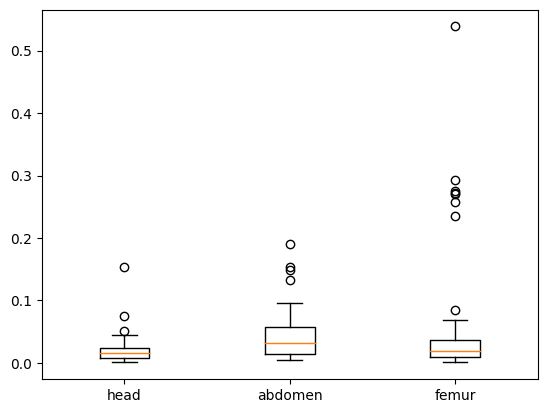

In [176]:
plt.boxplot([mape_head['mape'], mape_abdomen['mape'], mape_femur['mape']])
plt.xticks([1, 2, 3], ['head', 'abdomen', 'femur'])

In [3]:
df

,Group,Variable1,Variable2,Variable3
0,A,1,7,13
1,A,2,8,14
2,B,3,9,15
3,B,4,10,16
4,C,5,11,17
5,C,6,12,18


In [6]:
import plotly.express as px
import pandas as pd

# create a sample dataframe with three variables
df = pd.DataFrame({
    'Group': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Variable1': [1, 2, 3, 4, 5, 6],
})

# melt the dataframe to convert the three variables into one column
df_melted = pd.melt(df, id_vars='Group', var_name='Variable', value_name='Value')

# create the boxplot using plotly express
fig = px.box(df_melted, x='Group', y='Value', color='Variable')

# show the plot
fig.show()

In [74]:
all = [crb_kasia, crb_kinga, crb_natalia, crb_paula, crb_robert, crb_tomasz]
np.mean(all)

0.9403970543421729

In [87]:
import pingouin as pg
mape_femur_list = []
mae_femur_list = []
mape_head_list = []
mae_head_list = []
mape_abdomen_list = []
mae_abdomen_list = []
mape_all_list = []
for name in ['kasia', 'kinga', 'natalia', 'paula', 'robert', 'tomasz']:
    results_reg = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_reg_baseline.csv')
    gt_data = pd.read_csv(f'/data/kpusteln/Fetal-RL/data_preparation/test_data/{name}_biometry.csv')
    gt_data['HC'] = gt_data['HC'].str.replace(',', '.').astype(float)
    gt_data['BPD'] = gt_data['BPD'].str.replace(',', '.').astype(float)
    gt_data['AC'] = gt_data['AC'].str.replace(',', '.').astype(float)
    gt_data['FL'] = gt_data['FL'].str.replace(',', '.').astype(float)
    gt_hc = gt_data[['ID', 'HC']]
    gt_hc['ID'] = gt_hc['ID'].astype(str) + '_1'
    gt_ac = gt_data[['ID', 'AC']]
    gt_ac['ID'] = gt_ac['ID'].astype(str) + '_2'
    gt_fl = gt_data[['ID', 'FL']]
    gt_fl['ID'] = gt_fl['ID'].astype(str) + '_3'
    gt_ac = gt_ac.rename(columns={'AC': 'measures'})
    gt_fl = gt_fl.rename(columns={'FL': 'measures'})
    gt_hc = gt_hc.rename(columns={'HC': 'measures'})
    gt_all = pd.concat([gt_hc, gt_ac, gt_fl], axis=0)

    gt_all = gt_all.rename(columns={'ID': 'video'})
    gt_data_new = pd.DataFrame()
    gt_data_new['video'] = gt_all['video']
    gt_data_new['gt_measure'] = gt_all['measures']
    data_merged = pd.merge(results_reg, gt_data_new, on='video', how='right')
    data_merged['type'] = data_merged['video'].str.split('_', expand=True).iloc[:, 1]
    data_merged.dropna()
    data_merged['type'] = data_merged['video'].str.split('_', expand=True).iloc[:, 1]
    data_merged_grouped = data_merged.groupby('video', as_index=False).mean()
    data_merged_grouped['type'] = data_merged_grouped['video'].str.split('_', expand=True).iloc[:, 1]
    data_merged_grouped['gt_measure'] = data_merged_grouped['gt_measure']/10
    data_merged_grouped = data_merged_grouped.dropna()
    # per class
    data_femur = data_merged_grouped[data_merged_grouped['type'] == '3']
    data_head = data_merged_grouped[data_merged_grouped['type'] == '1']
    data_abdomen = data_merged_grouped[data_merged_grouped['type'] == '2']
    mape_all_list.append(mean_absolute_percentage_error(data_merged_grouped['gt_measure'], data_merged_grouped['measures']))
    mape_femur_list.append(mean_absolute_percentage_error(data_femur['gt_measure'], data_femur['measures']))
    mae_femur_list.append(mean_absolute_error(data_femur['gt_measure'], data_femur['measures']))
    mape_head_list.append(mean_absolute_percentage_error(data_head['gt_measure'], data_head['measures']))
    mae_head_list.append(mean_absolute_error(data_head['gt_measure'], data_head['measures']))
    mape_abdomen_list.append(mean_absolute_percentage_error(data_abdomen['gt_measure'], data_abdomen['measures']))
    mae_abdomen_list.append(mean_absolute_error(data_abdomen['gt_measure'], data_abdomen['measures']))

/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [88]:
np.mean(mape_all_list)

0.051782014640947026

In [89]:
print(np.mean(mape_femur_list))
print(np.mean(mae_femur_list))


0.05332449858100504
0.24870830660972276


In [90]:
print(np.mean(mape_head_list))
print(np.mean(mae_head_list))

0.04390322192571262
1.00805416779065


In [91]:
print(np.mean(mape_abdomen_list))
print(np.mean(mae_abdomen_list))

0.0666389243175498
1.2303601803344726


In [9]:
# femur
print('MAPE', mean_absolute_percentage_error(data_femur['gt_measure'], data_femur['measures']))
print('RMSE', mean_squared_error(data_femur['gt_measure'], data_femur['measures'], squared=False))
print('MAE', mean_absolute_error(data_femur['gt_measure'], data_femur['measures']))

MAPE 0.04351081034288075
RMSE 0.4016916901714157
MAE 0.20712754283278664


In [10]:
# head
print('MAPE', mean_absolute_percentage_error(data_head['gt_measure'], data_head['measures']))
print('RMSE', mean_squared_error(data_head['gt_measure'], data_head['measures'], squared=False))
print('MAE', mean_absolute_error(data_head['gt_measure'], data_head['measures']))

MAPE 0.01852384682244824
RMSE 0.5480969304260791
MAE 0.39160752975681834


In [11]:
# abdomen
print('MAPE', mean_absolute_percentage_error(data_abdomen['gt_measure'], data_abdomen['measures']))
print('RMSE', mean_squared_error(data_abdomen['gt_measure'], data_abdomen['measures'], squared=False))
print('MAE', mean_absolute_error(data_abdomen['gt_measure'], data_abdomen['measures']))

MAPE 0.05379286584591749
RMSE 1.333609893074184
MAE 0.9771920103265382


# Test results preparation

In [343]:
results_test = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/test_data/results_cls_new_model.csv')
videos = results_test['video'].copy()

In [344]:
results_test

,index,video,predict,probs,ps
0,755_2_82,755_2,3.0,0.000368,0.120677
1,755_3_38,755_3,0.0,0.000041,0.095226
2,755_3_149,755_3,5.0,0.082082,0.095226
3,755_3_198,755_3,0.0,0.000221,0.095226
4,755_2_53,755_2,3.0,0.000865,0.120677
...,...,...,...,...,...
36917,931_2_93,931_2,4.0,0.953151,0.080258
36918,931_1_24,931_1,2.0,0.659628,0.082444
36919,931_2_30,931_2,4.0,0.906672,0.080258
36920,931_2_37,931_2,4.0,0.884692,0.080258


In [345]:
results_test['type']= results_test['video'].str.split('_', expand=True)[1]

In [346]:
results_test_abdomen = results_test[results_test['type'] == '2']
results_test_femur = results_test[results_test['type'] == '3']
results_test_head = results_test[results_test['type'] == '1']

In [347]:
results_test_head_filtered = results_test_head[results_test_head['predict'] == 2]

In [348]:
results_test_head_filtered

,index,video,predict,probs,ps,type
9,755_1_192,755_1,2.0,0.503032,0.096661,1
14,755_1_195,755_1,2.0,0.544610,0.096661,1
164,755_1_194,755_1,2.0,0.530596,0.096661,1
178,755_1_193,755_1,2.0,0.522124,0.096661,1
286,755_1_200,755_1,2.0,0.559623,0.096661,1
...,...,...,...,...,...,...
36891,931_1_3,931_1,2.0,0.610238,0.082444,1
36895,931_1_4,931_1,2.0,0.610283,0.082444,1
36913,931_1_23,931_1,2.0,0.571966,0.082444,1
36918,931_1_24,931_1,2.0,0.659628,0.082444,1


In [351]:
results_test_head_filtered = results_test_head[results_test_head['predict'] == 2]
missing_videos_head = set(videos) - set(results_test_head_filtered['video'])
restults_head_missing_videos = results_test_head[results_test_head['video'].isin(missing_videos_head)]
head_df = pd.DataFrame({'index': restults_head_missing_videos['index'], 'video': restults_head_missing_videos['video'], 'probs': restults_head_missing_videos['probs']})
head_df_wide = pd.pivot_table(head_df, values='probs', index=['index'], columns=['video']).reset_index()
non_standard_plane_df = {}
for column in head_df_wide.columns:
    if column != 'index' and column != 'video':
        non_standard_planes = head_df_wide[[column, 'index']].sort_values(ascending=False, by=column)[:3]
        non_standard_planes_indexes = non_standard_planes['index'].values
        non_standard_plane_df[column] = non_standard_planes_indexes
non_standard_plane_df = pd.DataFrame(non_standard_plane_df)
non_standard_plane_df = non_standard_plane_df.values.flatten()
non_standard_plane_df_test = results_test_head[results_test_head['index'].isin(non_standard_plane_df)]
results_test_head_combined = pd.concat([results_test_head_filtered, non_standard_plane_df_test], axis=0)
assert len(results_test_head_combined['video'].unique()) == len(results_test_head['video'].unique())

In [352]:
results_test_head_combined

,index,video,predict,probs,ps,type
9,755_1_192,755_1,2.0,0.503032,0.096661,1
14,755_1_195,755_1,2.0,0.544610,0.096661,1
164,755_1_194,755_1,2.0,0.530596,0.096661,1
178,755_1_193,755_1,2.0,0.522124,0.096661,1
286,755_1_200,755_1,2.0,0.559623,0.096661,1
...,...,...,...,...,...,...
35676,1000_1_15,1000_1,1.0,0.044182,0.132185,1
35764,1000_1_14,1000_1,1.0,0.043804,0.132185,1
36079,974_1_49,974_1,1.0,0.410866,0.068373,1
36149,974_1_48,974_1,1.0,0.440376,0.068373,1


In [353]:
results_test_femur_filtered = results_test_femur[results_test_femur['predict'] == 6]
missing_videos_femur = set(videos) - set(results_test_femur_filtered['video'])
restults_femur_missing_videos = results_test_femur[results_test_femur['video'].isin(missing_videos_femur)]
femur_df = pd.DataFrame({'index': restults_femur_missing_videos['index'], 'video': restults_femur_missing_videos['video'], 'probs': restults_femur_missing_videos['probs']})
femur_df_wide = pd.pivot_table(femur_df, values='probs', index=['index'], columns=['video']).reset_index()
non_standard_plane_df = {}
for column in femur_df_wide.columns:
    if column != 'index' and column != 'video':
        non_standard_planes = femur_df_wide[[column, 'index']].sort_values(ascending=False, by=column)[:3]
        non_standard_planes_indexes = non_standard_planes['index'].values
        non_standard_plane_df[column] = non_standard_planes_indexes
non_standard_plane_df = pd.DataFrame(non_standard_plane_df)
non_standard_plane_df = non_standard_plane_df.values.flatten()
non_standard_plane_df_test = results_test_femur[results_test_femur['index'].isin(non_standard_plane_df)]
results_test_femur_combined = pd.concat([results_test_femur_filtered, non_standard_plane_df_test], axis=0)
assert len(results_test_femur_combined['video'].unique()) == len(results_test_femur['video'].unique())

In [354]:
results_test_abdomen_filtered = results_test_abdomen[results_test_abdomen['predict'] == 4]
missing_videos_abdomen = set(videos) - set(results_test_abdomen_filtered['video'])
restults_abdomen_missing_videos = results_test_abdomen[results_test_abdomen['video'].isin(missing_videos_abdomen)]
abdomen_df = pd.DataFrame({'index': restults_abdomen_missing_videos['index'], 'video': restults_abdomen_missing_videos['video'], 'probs': restults_abdomen_missing_videos['probs']})
abdomen_df_wide = pd.pivot_table(abdomen_df, values='probs', index=['index'], columns=['video']).reset_index()
non_standard_plane_df = {}
for column in abdomen_df_wide.columns:
    if column != 'index' and column != 'video':
        non_standard_planes = abdomen_df_wide[[column, 'index']].sort_values(ascending=False, by=column)[:3]
        non_standard_planes_indexes = non_standard_planes['index'].values
        non_standard_plane_df[column] = non_standard_planes_indexes
non_standard_plane_df = pd.DataFrame(non_standard_plane_df)
non_standard_plane_df = non_standard_plane_df.values.flatten()
non_standard_plane_df_test = results_test_abdomen[results_test_abdomen['index'].isin(non_standard_plane_df)]
results_test_abdomen_combined = pd.concat([results_test_abdomen_filtered, non_standard_plane_df_test], axis=0)
assert len(results_test_abdomen_combined['video'].unique()) == len(results_test_abdomen['video'].unique())

In [355]:
results_cls_combined = pd.concat([results_test_head_combined, results_test_femur_combined, results_test_abdomen_combined], axis=0)

In [356]:
results_cls_combined['video'].nunique()

300

In [357]:
new_results_cls_combined = results_cls_combined[['index', 'video', 'predict', 'ps']]

In [358]:
new_results_cls_combined['predict'] = new_results_cls_combined['predict'].astype(int)
new_results_cls_combined.to_csv('results_cls_new_detector2.csv', index=False)

/data/kpusteln/my-envs/swin/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
